## Bidirectional Encoder Representations from Transformers:

 - BERT, which stands for Bidirectional Encoder Representations from Transformers, is a natural language processing (NLP) model introduced by Google in 2018. 
 - It uses a bidirectional training approach to understand the context of words in a sentence by considering both preceding and following words. 
 - By pre-training on masked language modeling and next sentence prediction tasks, BERT learns contextual representations that capture word dependencies and sentence-level relationships. 

It revolutionized NLP by achieving state-of-the-art results on various language understanding tasks. After pre-training, BERT can be fine-tuned on specific tasks, leveraging its pre-trained knowledge to improve performance.

Fake news detection is a challenging task in which the goal is to distinguish between genuine and deceptive news articles or headlines. BERT's ability to understand the context and semantics of text makes it well-suited for this task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import torch 
# Provides the building blocks for creating and training neural 
# networks
import torch.nn as nn 
# Provides classes and functions for defining neural networks
import torch.optim as optim 
# Provides optimization algorithms for updating the 
# parameters of neural networks during training
import torch.nn.functional as F 
# Functions that are commonly used in neural network architectures
from transformers import BertTokenizer, BertForSequenceClassification
# BertForSequenceClassification class provides methods for training, 
# fine-tuning, and making predictions on sequence classification tasks.
# BertTokenizer handles the tokenization of input text and also 
# performs additional preprocessing steps like adding special tokens etc.
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
real = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

In [3]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake = shuffle(fake).reset_index(drop = True)
real = shuffle(real).reset_index(drop = True)
# nb_art = min(len(fake), len(real))
nb_art = 10000
real = real[:nb_art]
fake = fake[:nb_art]
print(len(real))
print(len(fake))

10000
10000


In [6]:
real['is_fake'] = False
fake['is_fake'] = True

In [7]:
real.head()

,title,text,subject,date,is_fake
0,"U.S. Vice President Biden to visit Serbia, Kos...",WASHINGTON (Reuters) - U.S. Vice President Joe...,politicsNews,"August 9, 2016",False
1,Jailed British-Iranian charity worker received...,BEIRUT (Reuters) - A British-Iranian charity w...,worldnews,"October 17, 2017",False
2,"Colombia names new peace negotiator with ELN, ...",BOGOTA (Reuters) - Colombia s President Juan M...,worldnews,"December 19, 2017",False
3,Clinton weighs making investment income taxabl...,"Nashua, NEW HAMPSHIRE (Reuters) - U.S. Democra...",politicsNews,"January 27, 2016",False
4,Clinton sole presidential hopeful to attend As...,NEW YORK (Reuters) - U.S. Democrat Hillary Cli...,politicsNews,"April 27, 2016",False


In [8]:
fake.head()

,title,text,subject,date,is_fake
0,SEAN SPICER CALLS OUT Race Baiting Journalist:...,,politics,"Mar 28, 2017",True
1,LYNCH MOB WINS By Less Than 1%…Why Republicans...,They threw everything but the kitchen sink at ...,left-news,"Dec 12, 2017",True
2,HERE’S THE LIST Of 25 Governors Who Have Told ...,There is a also a map (below) showing which st...,politics,"Nov 17, 2015",True
3,Watch Michelle Obama ROCK OUT In ‘Carpool Kar...,Michelle Obama showed off her amazing singing ...,News,"July 21, 2016",True
4,STUNNING STORY The Media And Democrats Hid Fro...,"In an email sent on April 15, 2011, our upstan...",left-news,"Mar 2, 2017",True


Now we merge both datasets.

In [9]:
data = pd.concat([real, fake])
data = shuffle(data).reset_index(drop = True)
data.head()

,title,text,subject,date,is_fake
0,"Zimbabwe pastor on trial for subversion, faces...",HARARE (Reuters) - Zimbabwe put on trial on Mo...,worldnews,"September 25, 2017",False
1,Death toll in Iran's western province quake re...,ANKARA (Reuters) - At least 328 people were ki...,worldnews,"November 13, 2017",False
2,Trump’s foundation says it violated 'self-deal...,(Reuters) - U.S. Republican President-elect Do...,politicsNews,"November 22, 2016",False
3,Brazilians toil for gold in illegal Amazon mines,"CREPURIZAO, Brazil (Reuters) - Informal mining...",worldnews,"September 14, 2017",False
4,Iran nuclear deal fight threatens Senate spend...,WASHINGTON (Reuters) - A battle over implement...,politicsNews,"April 27, 2016",False


### Splitting the Dataset:

In [10]:
train, validate, test = np.split(data.sample(frac = 1), [int(0.6*len(data)), int(0.8*len(data))])
train = train.reset_index(drop = True)
validate = validate.reset_index(drop = True)
test = test.reset_index(drop = True)

del real
del fake

print("Size of Training Set: {}".format(len(train)))
print("Size of Validation Set: {}".format(len(validate)))
print("Size of Testing Set: {}".format(len(test)))

Size of Training Set: 12000
Size of Validation Set: 4000
Size of Testing Set: 4000


In [11]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# This command used to determine and assign the appropriate device (CPU or GPU) for running PyTorch computations.
# By assigning the appropriate device, you can ensure that your code runs on the available hardware, taking advantage of 
# GPU acceleration if it's available, which can significantly speed up computations for deep learning models like BERT.
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', truncation=True, cache_dir='path_to_cache_directory')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', cache_dir='path_to_cache_directory')
# 'bert-base-uncased' represents the base version of the BERT model that has been 
# trained on English text without case sensitivity.
model.config.num_labels = 1
# By setting num_labels to 1, the model will be configured to output a single scalar value, typically 
# representing the probability or score of the positive class.

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

By freezing the pretrained portion, we prevent overfitting and ensure that the knowledge learned during pretraining is preserved.

In [12]:
# Freeze the pre-trained parameters:
for param in model.parameters():
    param.requires_grad = False
    
# Add three new layers at the end of the network:
model.classifier = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 2),
    nn.Softmax(dim = 1)
)
model = model.to(device)
criterion = nn.MSELoss().to(device)
optimizer = optim.SGD(model.classifier.parameters(), lr = 0.1)

In [13]:
def preprocess_text(text):
    parts = []
    text_len = len(text.split(' '))
    delta = 300
    max_parts = 5
    nb_cuts = int(text_len/delta)
    nb_cuts = min(nb_cuts, max_parts)
    
    for i in range(nb_cuts + 1):
        text_part = " ".join(text.split(' ')[(i * delta) : ((i + 1) * delta)])
        parts.append(tokenizer.encode(text_part, return_tensors = 'pt', max_length = 500).to(device))
    return parts

In [14]:
print_every = 300
total_loss = 0
all_losses = []
CUDA_LAUNCH_BLOCKING = 1 # When CUDA_LAUNCH_BLOCKING is set to 1, it enforces blocking 
# behavior for CUDA kernel launches, meaning that the CPU will wait for each CUDA 
# kernel (GPU operation) to complete before moving on to the next operation. This allows 
# for better debugging and profiling of CUDA operations.
model.train()

for idx, row in train.iterrows():
    text_parts = preprocess_text(str(row['text']))
    label = torch.tensor([row['is_fake']]).long().to(device)
    optimizer.zero_grad()
    overall_output = torch.zeros((1, 2)).float().to(device)
    for part in text_parts:
        if len(part) > 0:
            try:
                input = part.reshape(-1)[:512].reshape(1, -1)
                overall_output += model(input, labels=label)[1].float().to(device)
            except Exception as e:
                print(str(e))

    overall_output = F.softmax(overall_output[0], dim=-1)

    if label == 0:
        label = torch.tensor([1.0, 0.0]).float().to(device)
    elif label == 1:
        label = torch.tensor([0.0, 1.0]).float().to(device)

    loss = criterion(overall_output, label)
    total_loss += loss.item()
    
    loss.backward()
    optimizer.step()

    if idx % print_every == 0 and idx > 0:
        average_loss = total_loss / print_every
        print("{}/{}. Average loss: {}".format(idx, len(train), average_loss))
        all_losses.append(average_loss)
        total_loss = 0

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


300/12000. Average loss: 0.25224886062555013
600/12000. Average loss: 0.2071027099646441
900/12000. Average loss: 0.19849659102619627
1200/12000. Average loss: 0.16986004987877096
1500/12000. Average loss: 0.1530306543332214
1800/12000. Average loss: 0.17164521528960905
2100/12000. Average loss: 0.15501297453181298
2400/12000. Average loss: 0.2405974964206204
2700/12000. Average loss: 0.1198049791279603
3000/12000. Average loss: 0.14634915083997535
3300/12000. Average loss: 0.3773029082771033
3600/12000. Average loss: 0.1279426080773313
3900/12000. Average loss: 0.0966985119514023
4200/12000. Average loss: 0.10997222039843715
4500/12000. Average loss: 0.11508268548441265
4800/12000. Average loss: 0.08086576466975505
5100/12000. Average loss: 0.10497694447736648
5400/12000. Average loss: 0.13637177464545555
5700/12000. Average loss: 0.10786141822204627
6000/12000. Average loss: 0.09661225913722622
6300/12000. Average loss: 0.10442774747558967
6600/12000. Average loss: 0.1328272489583014

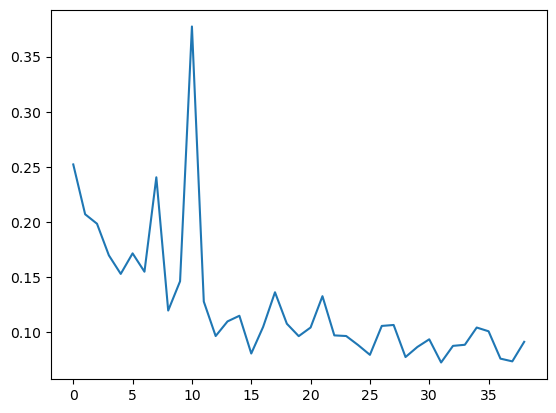

In [15]:
torch.save(model.state_dict(), "model_after_train.pt")
plt.plot(all_losses)

### Accuracy of The Model:

In [16]:
total = len(test)
number_right = 0
model.eval()
with torch.no_grad():
    for idx, row in test.iterrows():
        text_parts = preprocess_text(str(row['text']))
        label = torch.tensor([row['is_fake']]).float().to(device)
        
        overall_output = torch.zeros((1,2)).to(device)
        try:
            for part in text_parts:
                if len(part) > 0:
                    overall_output += model(part.reshape(1, -1))[0]
        except RuntimeError:
            print("GPU out of memory, skipping this entry.")
            continue
            
        overall_output = F.softmax(overall_output[0], dim=-1)
        result = overall_output.max(0)[1].float().item()
        if result == label.item():
            number_right += 1 
        if idx % print_every == 0 and idx > 0:
            print("{}/{}. Current accuracy: {}".format(idx, total, number_right / idx))
            
print("Accuracy on test data: {}".format(number_right / total))

300/4000. Current accuracy: 0.9566666666666667
600/4000. Current accuracy: 0.96
900/4000. Current accuracy: 0.9577777777777777
1200/4000. Current accuracy: 0.9516666666666667
1500/4000. Current accuracy: 0.9526666666666667
1800/4000. Current accuracy: 0.9522222222222222
2100/4000. Current accuracy: 0.9547619047619048
2400/4000. Current accuracy: 0.9525
2700/4000. Current accuracy: 0.9511111111111111
3000/4000. Current accuracy: 0.952
3300/4000. Current accuracy: 0.9518181818181818
3600/4000. Current accuracy: 0.9525
3900/4000. Current accuracy: 0.9512820512820512
Accuracy on test data: 0.95025


Let's try the model on two random articles.

In [17]:
def test(text):
    text_parts = preprocess_text(text)
    overall_output = torch.zeros((1,2)).to(device)
    try:
        for part in text_parts:
            if len(part) > 0:
                overall_output += model(part.reshape(1, -1))[0]
    except RuntimeError:
        print("GPU out of memory, skipping this entry.")

    overall_output = F.softmax(overall_output[0], dim=-1)

    value, result = overall_output.max(0)

    term = "News is Fake"
    if result.item() == 0:
        term = "News is Real"

    print("{} at {}%".format(term, value.item() * 100))

In [20]:
fake1 = """
The World Economic Forum lacks the authority to mandate anything for humanity. But a recent Instagram post suggests it can — and more absurdly that the nonprofit is requiring people to get microchipped. 
"WEF says CBDCs must be ‘implanted under your skin’ if you want to participate in society," reads a screenshot of a July 10 blog post headline that uses an abbreviation for the forum and central bank digital currencies. 
An image of a microchip on a finger appears below the headline. 
An Instagram post sharing a screenshot of the headline was flagged as part of Meta’s efforts to combat false news and misinformation on its News Feed. (Read more about our partnership with Meta, which owns Facebook and Instagram.)
"""

true1 = """
Price spikes, however, would cause demand to wither and some expensive avocados might be leftover, and stores might try to ration avocados, he added.
"Exactly what the retail strategy would be in this case, I’m not sure. But we would have vastly fewer avocados," Sumner said.
Just how fast avocados would disappear, if at all, would depend on whether the Trump administration enacts a full or partial border closure. White House economic adviser Larry Kudlow told CNBC he’s looking for ways to keep some commerce flowing.
"We are looking at different options, particularly if you can keep those freight lanes, the truck lanes, open," he said this week.  
Ben Holtz owns Rocky H Ranch, a 70-acre family-run avocado farm in northern San Diego County. He agreed avocados would run out within weeks.
"Mexico is the big player today. California is not. You shut down the border and California can’t produce to meet the demand," Holtz said. "There will be people without their guacamole."
While Mexico’s avocado harvest is year-round, California’s is limited to April through July. Growers in the state have picked only about 3 percent of what’s expected to be a much smaller crop of about 175 million pounds this year, Holtz said. A heat wave last summer reduced the crop size.
California’s avocado harvest has averaged approximately 300 million pounds in recent years, according to data from the California Avocado Commission. By contrast, the U.S. has imported more than 1.5 billion pounds of avocados from Mexico annually. Representatives from the commission did not respond to requests for this article.
Altogether, the U.S. received 43 percent of its fruit and vegetable imports from Mexico in 2016, according to the U.S. Department of Agriculture.
Also affecting this year’s avocado supply, a California avocado company in March recalled shipments to six states last month after fears the fruit might be contaminated with a bacterium that can cause health risks.
Until the early 2000s, California was the nation’s leading supplier of avocados, Holtz said. Mexico gradually overtook the state and now dominates sales in the U.S.
"It’s a very big possibility," Holtz said of avocado shortages. "Three weeks would dry up the Mexican inventory. California alone consumes more avocados than are grown in our state. Cold storage supply chain is basically three weeks or less of inventory. Most of the time it’s seven days."
A spokeswoman for the California Restaurant Association said "we haven’t heard concerns from restaurants, it doesn’t mean they aren’t worried." A national grocers association said it will "continue to closely monitor any developments" at the border, but did not have information about the potential impact on avocados.
"""

test(fake1)
test(true1)

News is Fake at 56.392455101013184%
News is Real at 88.05042505264282%
